# Exploratory Data Analysis on Haberman's Dataset

In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [2]:
# loading the dataset
df = pd.read_csv("haberman.csv")

# By default it displays 5 rows. You can mention the number of rows to display by just mentioning the number.
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Understanding the dataset variables


In [3]:
# Number of Datapoints and features
print(df.shape)

#Column names
print(df.columns)

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
#(Q) How many data points for each class are present? 
df["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


-------------------
#### Total number of columns: 4 (Age, Year, Nodes and Status)

#### Total number of rows: 306 
    
##### age: This column represents the age of a patient. 
    
##### year: This column represents the year of operation patient had undergone. 
    
##### nodes: Number of axil lymph nodes detected 
    
##### status: Represent if the patient is alive or died after operation.

----------------------

# Objective:

---------------------
### Analyse: How many patients died within 5 years and survived more than 5 years after undergoing cancer operation.
----------------

In [6]:
# Show how the classes labeled
df['status'].unique()

array([1, 2], dtype=int64)

In [7]:
#Counting number of datapoints in each class
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

---------------------
#### Survival_Status column has 2 unique values which are 1 and 2.
##### 1 represents patient has survived after operation.
##### 2 represents patient has died after operation
-----------------------

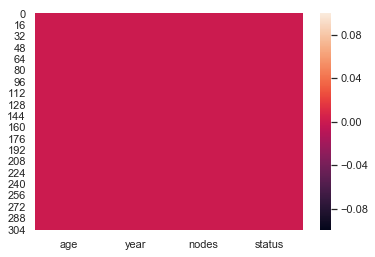

In [8]:
# Check if dataset df has null values.
sns.heatmap(df.isnull())
plt.show()

---------------
#### It seems that dataset df has no null values.
------------

# Data Preparation


In [9]:
print('Number of columns:' + ' ' + str(df.shape[0]))
print('Number of rows:' + ' ' + str(df.shape[1]))

Number of columns: 306
Number of rows: 4


In [10]:
print('Total number of patients survived after operation:' + ' ' + str(df[df['status'] == 1]['status'].count()))
print('Total number of patients survived after operation:' + ' ' + str(df[df['status'] == 2]['status'].count()))
print()
print('************************************')
print()
print("Percentage of patients survived and not survived after operation respectively")
print(str(round(100*(df['status'].value_counts())/len(df.index),2)))

Total number of patients survived after operation: 225
Total number of patients survived after operation: 81

************************************

Percentage of patients survived and not survived after operation respectively
1    73.53
2    26.47
Name: status, dtype: float64


# Exploratory Data Analysis


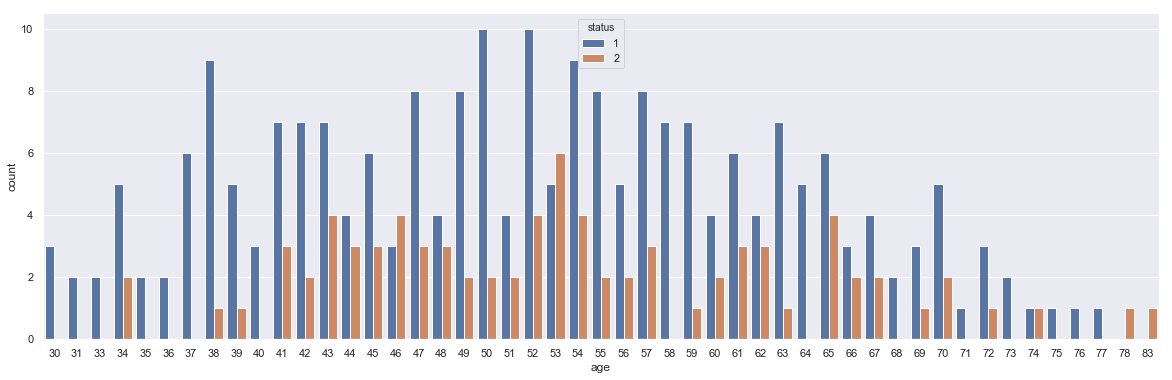

In [11]:
# Create a countplot based on ages
plt.figure(figsize=(20,6))
sns.countplot(data = df, x = 'age', hue = 'status')
plt.show()

# Observation:

------------
#### Improper data to analyse the cancer affected age group
------------

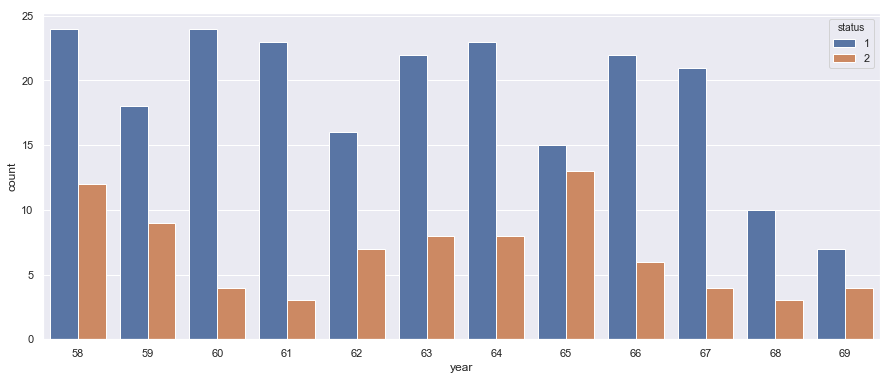

In [12]:
# Create a countplot based on years
plt.figure(figsize=(15,6))
sns.countplot(data = df, x = 'year', hue='status')
plt.show()

# Observation:

----------
#### Most of cancer patients survived more than 5 years after operation
------------

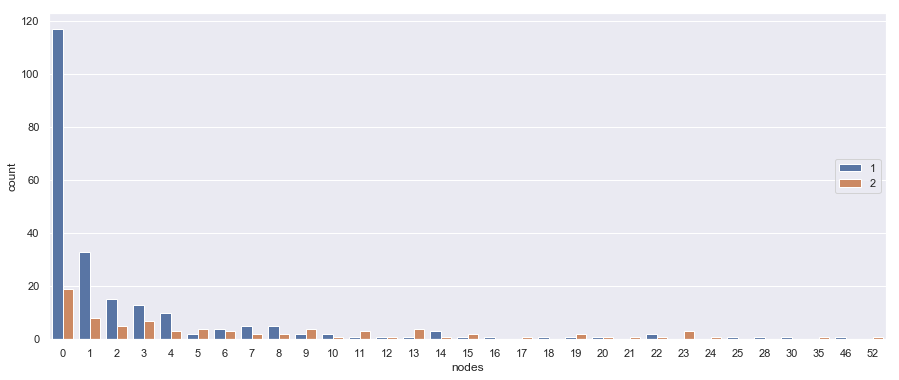

In [13]:
# Create a countplot based on nodes
plt.figure(figsize=(15,6))
sns.countplot(data = df, x = 'nodes', hue='status')
plt.legend(loc=5)
plt.show()

# Observation:

----
#### Patients with less number of axil nodes have more chances of surviving
-------

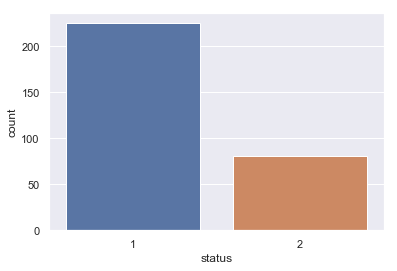

In [14]:
# Create a countplot based on status
sns.countplot(data = df, x = 'status')
plt.show()

--------------
###### Blue line - 225 cancer patients survived for more than 5 years after operation

###### Orange line - 81 cancer patients died within 5 years after operation
----------

# Univariate Analysis:


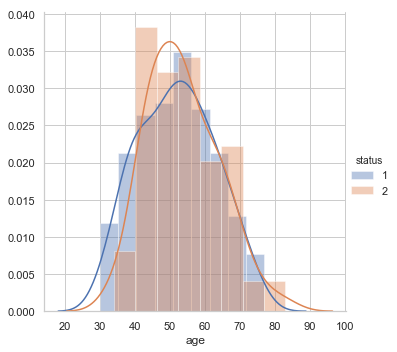

In [34]:
# Analysing age variable using distplot.
f = sns.FacetGrid(data = df, hue = 'status', size = 5)
f.map(sns.distplot, 'age')
f.add_legend()
plt.show()

# Observation:

-----------------
#### Huge overlap. Can't use 'age' data to analyse.
-----

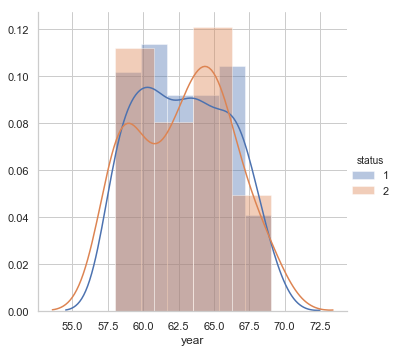

In [35]:
# Analysing year variable using distplot
f = sns.FacetGrid(data = df, hue = 'status', size = 5)
f.map(sns.distplot, 'year')
f.add_legend()
plt.show()

# Observation:

-----------
#### Huge overlap. Can't use 'year' data to analyse
-------------

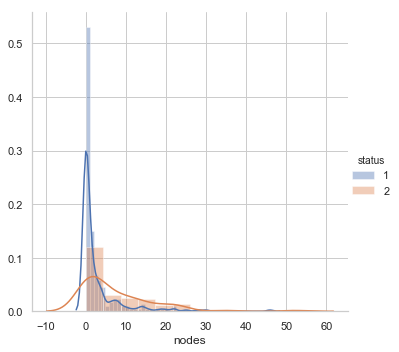

In [36]:
# Analsing nodes variable using distplot
f = sns.FacetGrid(data = df, hue = 'status', size = 5)
f.map(sns.distplot, 'nodes')
f.add_legend()
plt.show()

# Observation:

--------------
#### 1) Less overlap when compared to age and year

#### 2) Patients with less number of nodes have survived cancer for more than 5 years after operation.

#### 3) We can use 'nodes' data to analyse.
----------------

# PDF: Probability Density Function and CDF: Cummulative Density Function.

# Observation:


Probability Densities Per Each Bin
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

Bin Edged
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


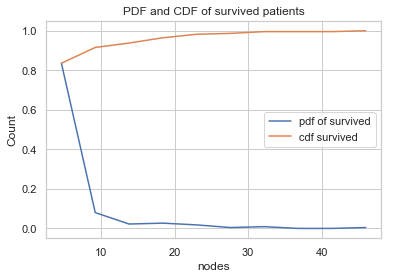

In [41]:
# Create PDF and CDF of survived patients
sns.set_style('whitegrid')
counts, bins = np.histogram(df[df['status']==1]['nodes'], bins = 10, density = True)
pdf = counts/sum(counts)
print('Probability Densities Per Each Bin')
print(pdf)
print()
print('Bin Edged')
print(bins)
cdf = np.cumsum(pdf)
plt.plot(bins[1:], pdf)
plt.plot(bins[1:], cdf)
plt.title('PDF and CDF of survived patients')
plt.xlabel('nodes')
plt.ylabel('Count')
plt.legend(['pdf of survived', 'cdf survived'])
plt.show()

--------
#### From the CDF, 90% patients who survived cancer after operation have less than 10 nodes
--------

Probability Densities Per Each Bin
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]

Bin Edges
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


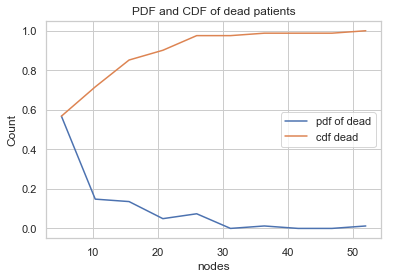

In [42]:
# Create PDF and CDF of dead patients
sns.set_style('whitegrid')
counts, bins = np.histogram(df[df['status']==2]['nodes'], bins = 10, density = True)
pdf = counts/sum(counts)
print('Probability Densities Per Each Bin')
print(pdf)
print()
print('Bin Edges')
print(bins)
cdf = np.cumsum(pdf)
plt.plot(bins[1:], pdf)
plt.plot(bins[1:], cdf)
plt.title('PDF and CDF of dead patients')
plt.xlabel('nodes')
plt.ylabel('Count')
plt.legend(['pdf of dead', 'cdf dead'])
plt.show()

# Observation:

------------
#### From the CDF, 70% patients who died cancer after operation have more than 10 nodes
-----------

# Mean, Median, Standard Deviation

In [43]:
print('****** Mean of nodes for survived and dead patients ******', '\n')
print('Survived patients')
print(df[df['status']== 1]['nodes'].mean(), '\n')
print('Dead patients')
print(df[df['status']== 2]['nodes'].mean(), '\n')
print('****** Median of nodes for survived and dead patients ******',
'\n')
print('Survived patients')
print(df[df['status']== 1]['nodes'].median(), '\n')
print('Dead patients')
print(df[df['status']== 2]['nodes'].median(), '\n')
print('****** Standard deviation of Nodes for survived and dead patients ******', '\n')
print('Survived patients')
print(df[df['status']== 1]['nodes'].std(), '\n')
print('Dead patients')
print(df[df['status']== 2]['nodes'].std(), '\n')

****** Mean of nodes for survived and dead patients ****** 

Survived patients
2.7911111111111113 

Dead patients
7.45679012345679 

****** Median of nodes for survived and dead patients ****** 

Survived patients
0.0 

Dead patients
4.0 

****** Standard deviation of Nodes for survived and dead patients ****** 

Survived patients
5.870318127719728 

Dead patients
9.185653736555782 



# Percentile of Nodes

In [21]:
print('****** Percentiles of nodes for survived and dead patients ******', '\n')
print('Survived patients', '\n')
print('10th percentile is' + ' '+ str(np.percentile(df[df['status']==1]['nodes'], 10)))
print('60th percentile is' + ' '+ str(np.percentile(df[df['status']==1]['nodes'], 60)))
print('90th percentile is' + ' '+ str(np.percentile(df[df['status']==1]['nodes'], 90)))
print('99th percentile is' + ' '+ str(np.percentile(df[df['status']==1]['nodes'], 99)))
print()
print('Dead patients', '\n')
print('10th percentile is' + ' '+ str(np.percentile(df[df['status']==2]['nodes'], 10)))
print('60th percentile is' + ' '+ str(np.percentile(df[df['status']==2]['nodes'], 60)))
print('90th percentile is' + ' '+ str(np.percentile(df[df['status']==2]['nodes'], 90)))
print('99th percentile is' + ' '+ str(np.percentile(df[df['status']==2]['nodes'], 99)))


****** Percentiles of nodes for survived and dead patients ****** 

Survived patients 

10th percentile is 0.0
60th percentile is 1.0
90th percentile is 8.0
99th percentile is 27.279999999999973

Dead patients 

10th percentile is 0.0
60th percentile is 6.0
90th percentile is 20.0
99th percentile is 38.40000000000005


# Quantile of Nodes


In [22]:
print('****** Quantiles of nodes ******', '\n')
print('Survived patients')
print(np.percentile(df[df['status']==1]['nodes'], np.arange(0,100,25)))
print()
print('Dead patients')
print(np.percentile(df[df['status']==2]['nodes'], np.arange(0,100,25)))


****** Quantiles of nodes ****** 

Survived patients
[0. 0. 0. 3.]

Dead patients
[ 0.  1.  4. 11.]


# Median Absolute Deviation of Nodes

In [23]:
from statsmodels import robust
print('****** Median Absolute Deviation of nodes for survived and dead patients ******', '\n')
print('Survived patients')
print('MAD:' + ' ' + str(robust.mad(df[df['status']==1]['nodes'])))
print()
print('Dead patients')
print('MAD:' + ' ' + str(robust.mad(df[df['status']==2]['nodes'])))


****** Median Absolute Deviation of nodes for survived and dead patients ****** 

Survived patients
MAD: 0.0

Dead patients
MAD: 5.930408874022408


# Box plot to get percentiles graphically.


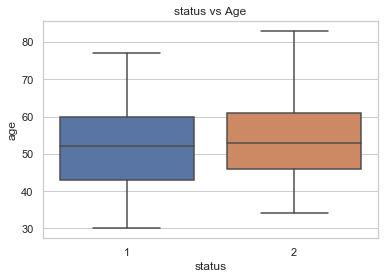

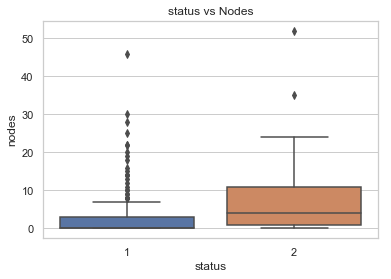

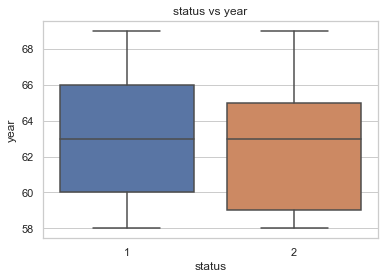

In [24]:
sns.boxplot(x = 'status', y = 'age', data = df)
plt.title('status vs Age')
plt.show()
sns.boxplot(x = 'status', y = 'nodes', data = df)
plt.title('status vs Nodes')
plt.show()
sns.boxplot(x = 'status', y = 'year', data = df)
plt.title('status vs year')
plt.show()

# Violin plot to get percentiles graphically

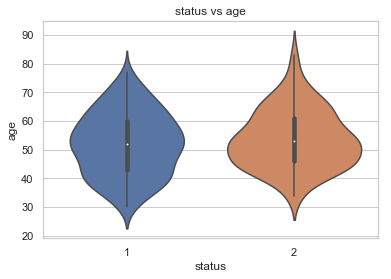

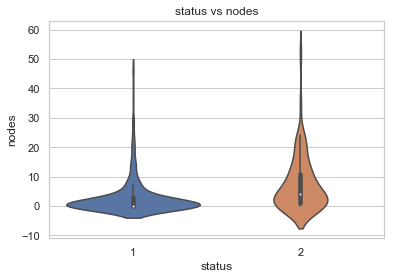

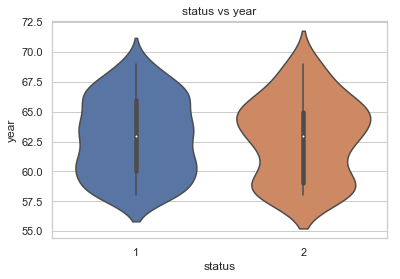

In [25]:
sns.violinplot(x = 'status', y = 'age', data = df)
plt.title('status vs age')
plt.show()
sns.violinplot(x = 'status', y = 'nodes', data = df)
plt.title('status vs nodes')
plt.show()
plt.title('status vs year')
sns.violinplot(x = 'status', y = 'year', data = df)
plt.show()

# Bivariate analysis

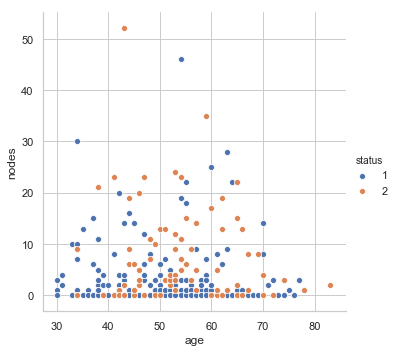

In [47]:
# Create a scatterplot of age and nodes varaibles
f = sns.FacetGrid(data = df, hue = 'status', size = 5)
f.map(sns.scatterplot, 'age','nodes')
f.add_legend()
plt.show()

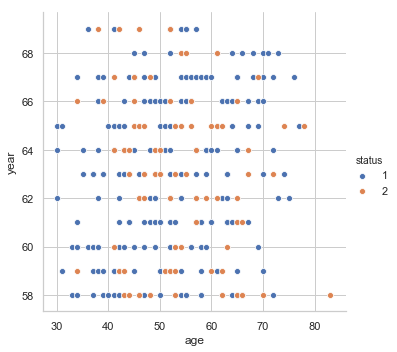

In [49]:
# Create a scatter plot of age and year variables
f = sns.FacetGrid(data = df, hue = 'status', size = 5)
f.map(sns.scatterplot, 'age','year')
f.add_legend()
plt.show()

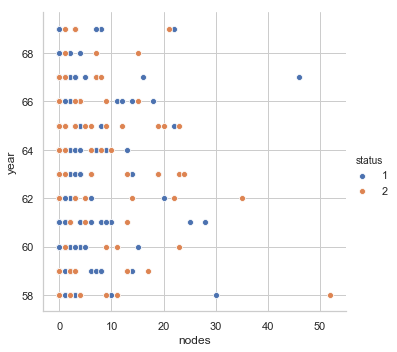

In [50]:
# Create a scatter plot of nodes and year variables
f = sns.FacetGrid(data = df, hue = 'status', size = 5)
f.map(sns.scatterplot, 'nodes','year')
f.add_legend()
plt.show()

# Observation:


-------------
#### Since all scatter plots are overlapping, they shouldn't be considered to analyse.
----------------

# Pair plot

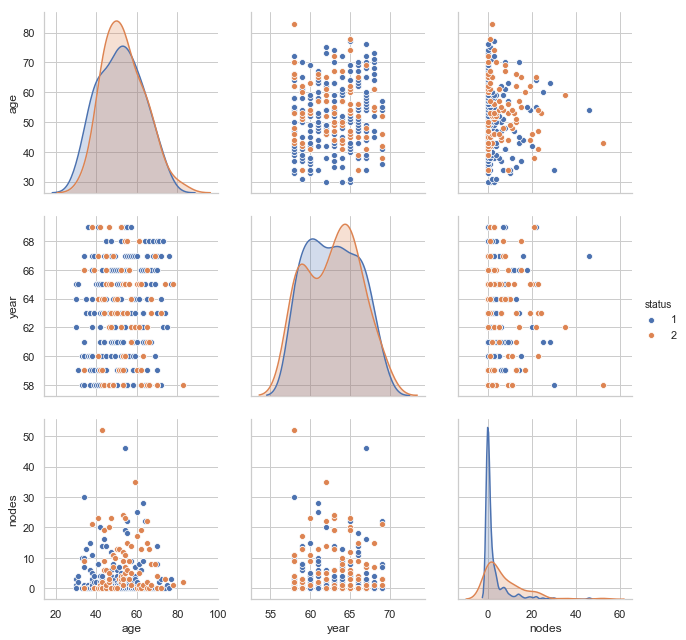

In [51]:
# Create a pair plot of df elements
sns.pairplot(data = df, hue = 'status', vars = ['age', 'year', 'nodes'], size=3)
plt.show()

# Observation:


-----------------
#### As we see, only nodes is better when compared to age and year
-------------

# Multivariate analysis

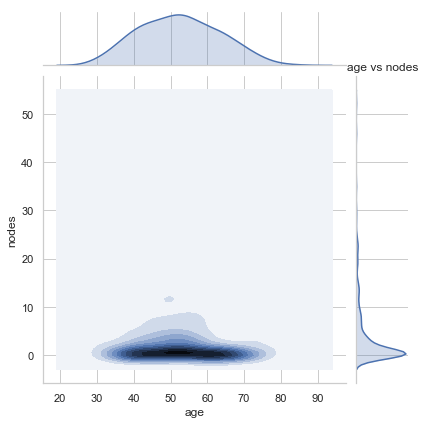

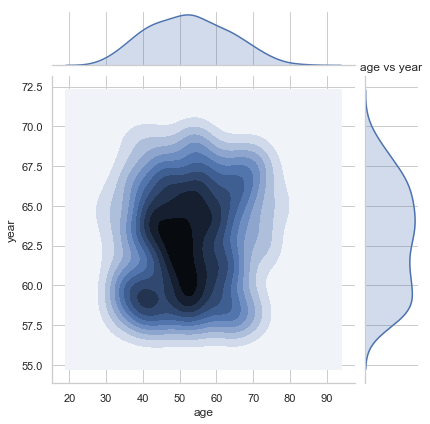

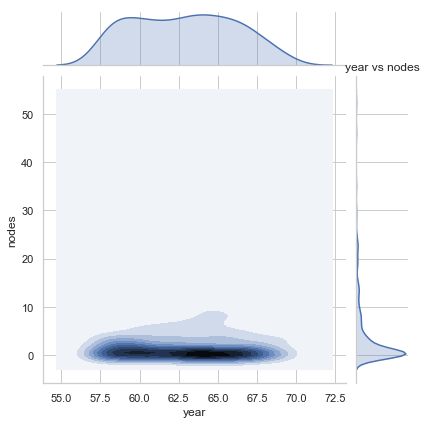

In [31]:
#Contour plot
sns.jointplot(data = df, x='age', y='nodes', kind='kde')
plt.title('age vs nodes')
plt.show()
sns.jointplot(data = df, x='age', y='year', kind='kde')
plt.title('age vs year')
plt.show()
sns.jointplot(data = df, x='year', y='nodes', kind='kde')
plt.title('year vs nodes')
plt.show()

# Statistical analysis of survived and died patients

In [32]:
# Status of died patients within 5 years of operation
df[df['status']==1].describe()


,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [33]:
# Status of died patients within 5 years of operation
df[df['status']==2].describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# Conclusion:

--------------------
#### 1) Most patients (90%) with less nodes (<10) survived for more than 5 years after operation.

#### 2) Nodes feature is better than Age and Year feature to analyse status of patients.

#### 3) Patients having more nodes (>10) have more chances of dying within 5 years after operation
---------------